In [1]:
%pylab inline
from __future__ import print_function
import pandas as pd
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set_style("white")
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10

Populating the interactive namespace from numpy and matplotlib


# Loading data

In [48]:
data = pd.read_csv('data/data.csv', index_col=0, parse_dates=True,date_parser=lambda a: pd.to_datetime(a, unit='s'), skiprows=0)
data.columns = ['NO2-A', 'NO2-W', 'Ox-A', 'Ox-W', 'CO-A', 'CO-W', 'T', 'NC', 'RH', 
                'S1', 'S2', 'S3', 'Temp', 'R-CO', 'R-NO', 'R-NO2', 'R-O3', 'R-Temp']
data = data.dropna()

In [60]:
input_columns = ['S1', 'S2', 'S3', 'T', 'NC', 'RH']
target_columns = ['R-CO', 'R-NO', 'R-NO2', 'R-O3', 'R-Temp']

In [61]:
X, Y = data[input_columns], data[target_columns]

# Linear Models

In [62]:
model = LinearRegression()
model.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [63]:
ypred = model.predict(X)

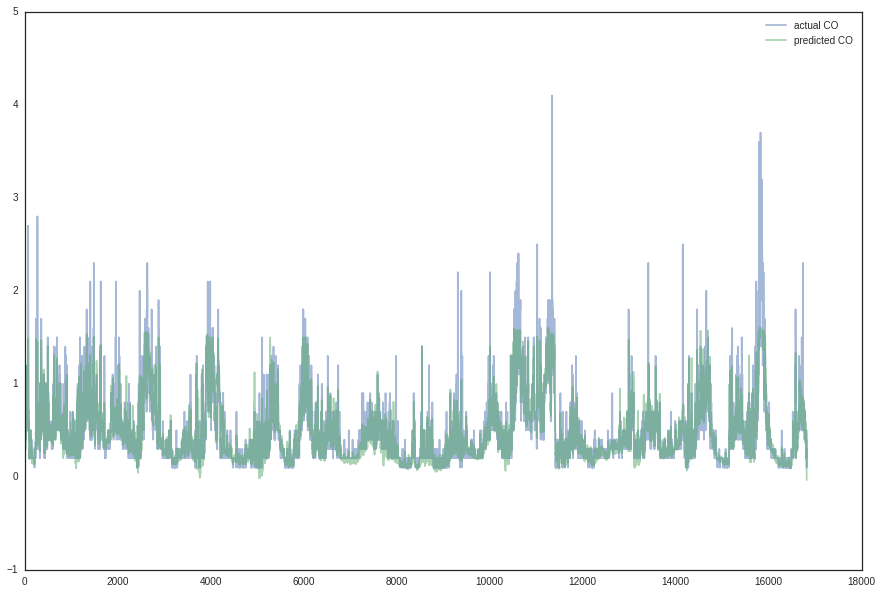

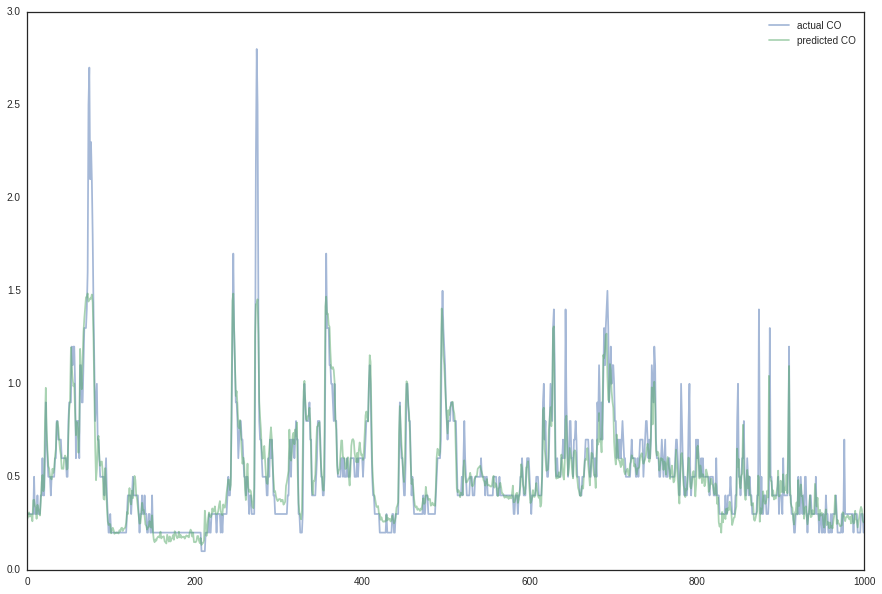

In [64]:
figure();
plot(Y['R-CO'].as_matrix(), label='actual CO', alpha=0.5);
plot(ypred[:, 0], label='predicted CO', alpha=0.5);
legend(loc='best')
figure();
plot(Y['R-CO'].as_matrix()[:1000], label='actual CO', alpha=0.5);
plot(ypred[:, 0][:1000], label='predicted CO', alpha=0.5);
legend(loc='best')
xlim(0, 1000);

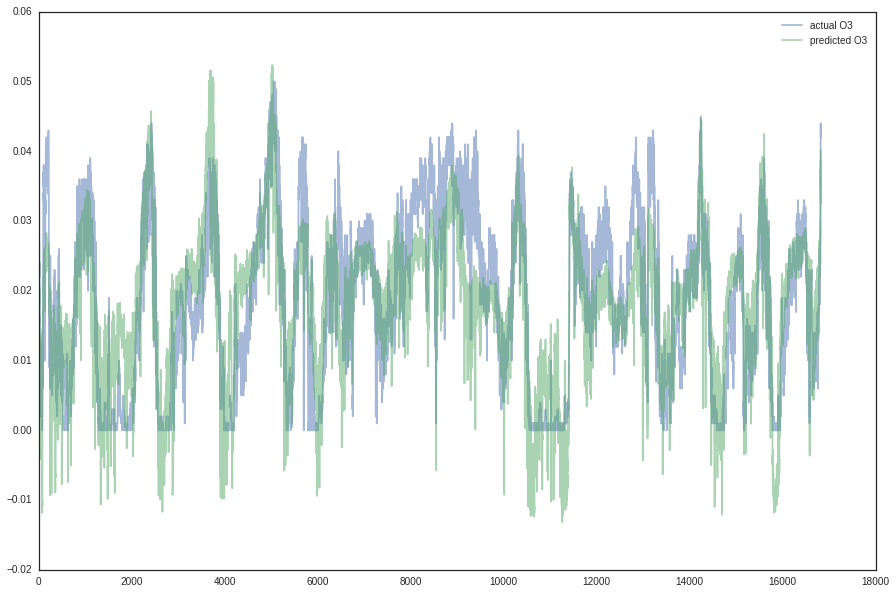

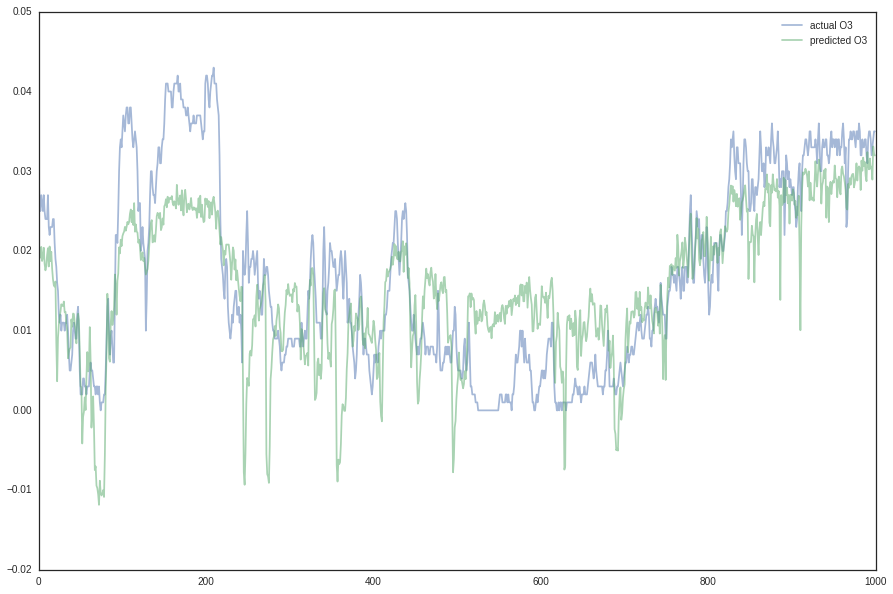

In [65]:
figure();
plot(Y['R-O3'].as_matrix(), label='actual O3', alpha=0.5);
plot(ypred[:, 3], label='predicted O3', alpha=0.5);
legend(loc='best')
figure();
plot(Y['R-O3'].as_matrix()[:1000], label='actual O3', alpha=0.5);
plot(ypred[:, 3][:1000], label='predicted O3', alpha=0.5);
legend(loc='best')
xlim(0, 1000);

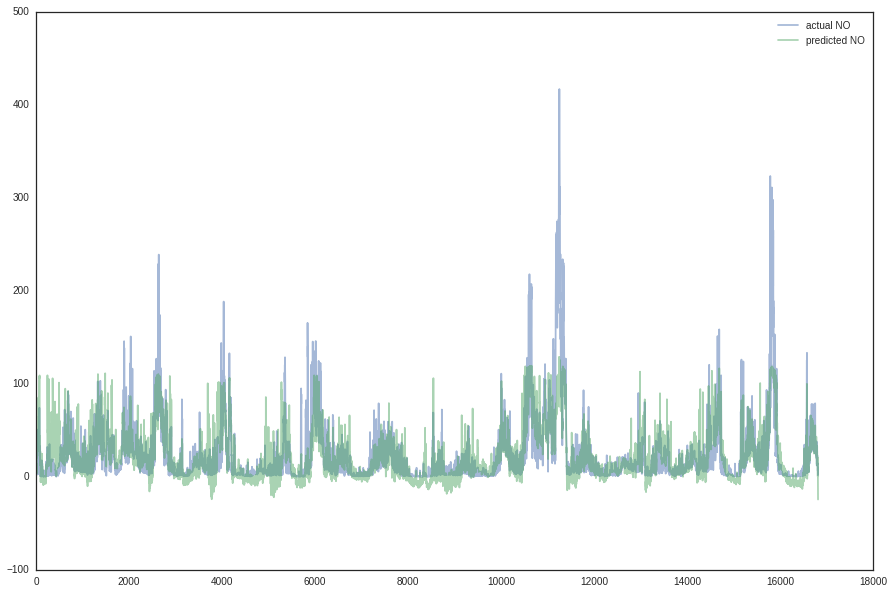

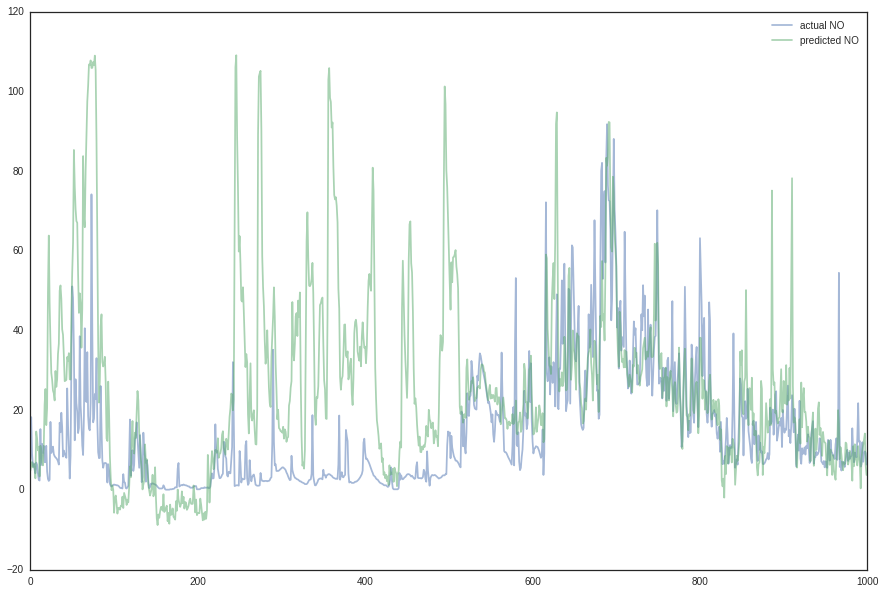

In [66]:
figure();
plot(Y['R-NO'].as_matrix(), label='actual NO', alpha=0.5);
plot(ypred[:, 1], label='predicted NO', alpha=0.5);
legend(loc='best')
figure();
plot(Y['R-NO'].as_matrix()[:1000], label='actual NO', alpha=0.5);
plot(ypred[:, 1][:1000], label='predicted NO', alpha=0.5);
legend(loc='best')
xlim(0, 1000);

In [ ]:
figure();
plot(y['NO-ppb'].as_matrix(), label='actual NO', alpha=0.5);
plot(ypred[:, 2], label='predicted O3', alpha=0.5);
legend(loc='best')
figure();
plot(y['NO-ppb'].as_matrix()[:1000], label='actual NO', alpha=0.5);
plot(ypred[:, 2][:1000], label='predicted NO', alpha=0.5);
legend(loc='best')
xlim(0, 1000);